In [770]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sts
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing

In [790]:
"""Reading manipulating file with country name
and returning a dataframe and transpose of the dataframe as return"""
def dataFrame(file_name, col, value1,countries):
    # Reading Data for dataframe
    df = pd.read_csv(file_name, skiprows = 4)
    # Grouping data with col value
    df1 = df.groupby(col, group_keys = True)
    #retriving the data with the all the group element
    df1 = df1.get_group(value1)
    #Reseting the index of the dataframe
    df1 = df1.reset_index()
    #Storing the column data in a variable
    a = df1['Country Name']
    # cropping the data from dataframe
    df1 = df1.iloc[countries,2:]
    df1 = df1.drop(columns=['Indicator Name', 'Indicator Code']) 
    df1.insert(loc=0, column='Country Name', value=a)
    #Dropping the NAN values from dataframe Column wise
    df1= df1.dropna(axis = 0)
    #transposing the index of the dataframe
    df2 = df1.set_index('Country Name').T
    #returning the normal dataframe and transposed dataframe
    return df1, df2

In [792]:
# years using for the data analysis
#years = 35
# countries which are using for data analysis
countries = [35, 55, 81, 109]
'''calling dataFrame functions for all the dataframe which will be used for visualization'''
GDP_capita_c, GDP_capita_y = dataFrame("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4770417.csv",
                                       "Indicator Name", "GDP per capita (current US$)",countries)

GDP_capita_c

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Canada,CAN,2259.250511,2240.433039,2268.585346,2374.498448,2555.111146,2770.361804,3047.106147,3217.159294,...,52669.089960,52635.17496,50955.998320,43596.135540,42315.603710,45129.429300,46548.638410,46328.671840,43258.263870,51987.939050
81,United Kingdom,GBR,1397.594803,1472.385714,1525.775853,1613.456884,1748.288118,1873.567774,1986.747159,2058.781882,...,42485.586070,43449.09172,47447.588930,45071.074320,41146.077360,40621.334480,43306.308300,42747.080460,40318.557570,46510.282780
109,India,IND,83.035102,85.969704,90.276869,101.315165,115.487608,119.082476,89.757583,96.046330,...,1434.018198,1438.05748,1559.864518,1590.173918,1714.280355,1957.968841,1974.377788,2047.232704,1910.421473,2256.590409


In [793]:
GDP_capita_y=GDP_capita_y.drop('Country Code',axis=0)
GDP_capita_y

Country Name,Canada,United Kingdom,India
1960,2259.250511,1397.594803,83.035102
1961,2240.433039,1472.385714,85.969704
1962,2268.585346,1525.775853,90.276869
1963,2374.498448,1613.456884,101.315165
1964,2555.111146,1748.288118,115.487608
...,...,...,...
2017,45129.4293,40621.33448,1957.968841
2018,46548.63841,43306.3083,1974.377788
2019,46328.67184,42747.08046,2047.232704
2020,43258.26387,40318.55757,1910.421473


In [794]:
x = GDP_capita_y.values #returns a numpy array
x

array([[2259.250511, 1397.594803, 83.03510182],
       [2240.433039, 1472.385714, 85.96970419],
       [2268.585346, 1525.775853, 90.27686893],
       [2374.498448, 1613.456884, 101.315165],
       [2555.111146, 1748.288118, 115.4876084],
       [2770.361804, 1873.567774, 119.0824759],
       [3047.106147, 1986.747159, 89.75758261],
       [3217.159294, 2058.781882, 96.04632985],
       [3462.678872, 1951.758596, 99.51683612],
       [3763.953379, 2100.667869, 107.1821431],
       [4121.932814, 2347.544318, 111.9683182],
       [4520.162878, 2649.801514, 118.1597985],
       [5089.587902, 3030.432514, 122.6124534],
       [5838.660894, 3426.276221, 143.456125],
       [7033.011021, 3665.862798, 163.2316156],
       [7511.211343, 4299.745618, 157.929385],
       [8809.26466, 4138.167788, 161.1372361],
       [8919.057461, 4681.439932, 186.4201346],
       [9123.691334, 5976.938169, 206.0737493],
       [10043.66096, 7804.762081, 224.5754377],
       [11170.56397, 10032.06208, 267.390578

In [795]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)


In [796]:
normalized_df

,0,1,2
0,0.000373,0.000000,0.000000
1,0.000000,0.001525,0.001350
2,0.000558,0.002614,0.003332
3,0.002659,0.004402,0.008410
4,0.006240,0.007151,0.014931
...,...,...,...
57,0.850489,0.799868,0.862611
58,0.878631,0.854621,0.870161
59,0.874270,0.843217,0.903680
60,0.813383,0.793693,0.840736


In [797]:
wcss = []
y=normalized_df.values

y

array([[3.73150370e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.52516933e-03, 1.35013927e-03],
       [5.58260099e-04, 2.61392465e-03, 3.33176114e-03],
       [2.65851635e-03, 4.40195500e-03, 8.41021304e-03],
       [6.24006520e-03, 7.15149314e-03, 1.49306100e-02],
       [1.05084846e-02, 9.70625128e-03, 1.65845212e-02],
       [1.59963235e-02, 1.20142553e-02, 3.09285012e-03],
       [1.93684765e-02, 1.34832193e-02, 5.98614997e-03],
       [2.42371284e-02, 1.13007531e-02, 7.58284560e-03],
       [3.02114003e-02, 1.43373768e-02, 1.11094671e-02],
       [3.73101306e-02, 1.93717905e-02, 1.33114701e-02],
       [4.52070306e-02, 2.55355529e-02, 1.61600197e-02],
       [5.64987259e-02, 3.32975486e-02, 1.82085781e-02],
       [7.13528393e-02, 4.13697685e-02, 2.77982451e-02],
       [9.50367960e-02, 4.62555239e-02, 3.68964680e-02],
       [1.04519506e-01, 5.91819426e-02, 3.44570405e-02],
       [1.30259896e-01, 5.58869761e-02, 3.59328948e-02],
       [1.32437087e-01, 6.69656

In [798]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)
    
wcss


C:\Users\Puneet\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[18.667004085055307,
 4.217049601509542,
 1.7077509963339619,
 1.062728378024218,
 0.7472472787572442,
 0.571860811670025,
 0.3916455856217306,
 0.31447317415285975,
 0.2681774235161177]

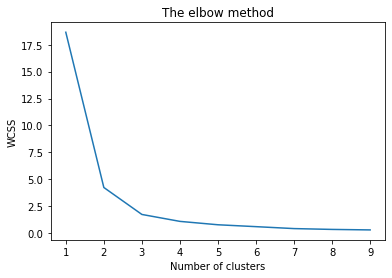

In [799]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [801]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(normalized_df)

In [802]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [803]:
lables = kmeans.fit_predict(normalized_df)
centroids= kmeans.cluster_centers_

In [804]:
centroids

array([[0.40312444, 0.47824541, 0.14884277],
       [0.10227677, 0.07184506, 0.04264252],
       [0.87048619, 0.85713341, 0.64673163]])

In [805]:
'''normalized_df['lables']=lables
normalized_df
'''

"normalized_df['lables']=lables\nnormalized_df\n"

In [806]:
normalized_df.values[y_kmeans == 0, 1]

array([0.29751703, 0.30265825, 0.36090284, 0.37732405, 0.38928307,
       0.34649665, 0.37341913, 0.44465448, 0.46989761, 0.51763701,
       0.54856222, 0.55853603, 0.54842165, 0.54017956, 0.58489736,
       0.67461865, 0.79516639])

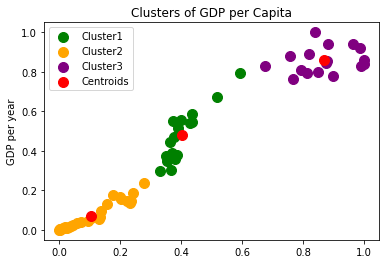

In [808]:
plt.figure()
plt.scatter(normalized_df.values[y_kmeans == 0, 0], normalized_df.values[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster1')
plt.scatter(normalized_df.values[lables == 1, 0], normalized_df.values[lables == 1, 1], s = 100, c = 'orange', label = 'Cluster2')
plt.scatter(normalized_df.values[lables == 2, 0], normalized_df.values[lables == 2, 1], s = 100, c = 'purple', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.legend()
plt.title('Clusters of GDP per Capita')
plt.xlabel('')
plt.ylabel('GDP per year')
plt.show()
